# Can we find out name of the tree from shape of a leaf?

Dataset from: https://www.kaggle.com/c/leaf-classification/data

#### Description
The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

# Section 1: Ahem - what do we have in terms of data?

In [1]:
import numpy as np
import pandas as pd
import os

from IPython.display import Image

In [2]:
!ls data

kaggle_images random_images test.csv      train.csv


In [3]:
train_data = pd.read_csv('./data/train.csv')

In [4]:
train_data.shape

(990, 194)

In [5]:
cols = train_data.columns
for col in cols:
    print(col)
    
for i in range(1, 50):
    print(train_data.iloc[0]['shape' + str(i)])

id
species
margin1
margin2
margin3
margin4
margin5
margin6
margin7
margin8
margin9
margin10
margin11
margin12
margin13
margin14
margin15
margin16
margin17
margin18
margin19
margin20
margin21
margin22
margin23
margin24
margin25
margin26
margin27
margin28
margin29
margin30
margin31
margin32
margin33
margin34
margin35
margin36
margin37
margin38
margin39
margin40
margin41
margin42
margin43
margin44
margin45
margin46
margin47
margin48
margin49
margin50
margin51
margin52
margin53
margin54
margin55
margin56
margin57
margin58
margin59
margin60
margin61
margin62
margin63
margin64
shape1
shape2
shape3
shape4
shape5
shape6
shape7
shape8
shape9
shape10
shape11
shape12
shape13
shape14
shape15
shape16
shape17
shape18
shape19
shape20
shape21
shape22
shape23
shape24
shape25
shape26
shape27
shape28
shape29
shape30
shape31
shape32
shape33
shape34
shape35
shape36
shape37
shape38
shape39
shape40
shape41
shape42
shape43
shape44
shape45
shape46
shape47
shape48
shape49
shape50
shape51
shape52
shape53
shape54

In [6]:
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


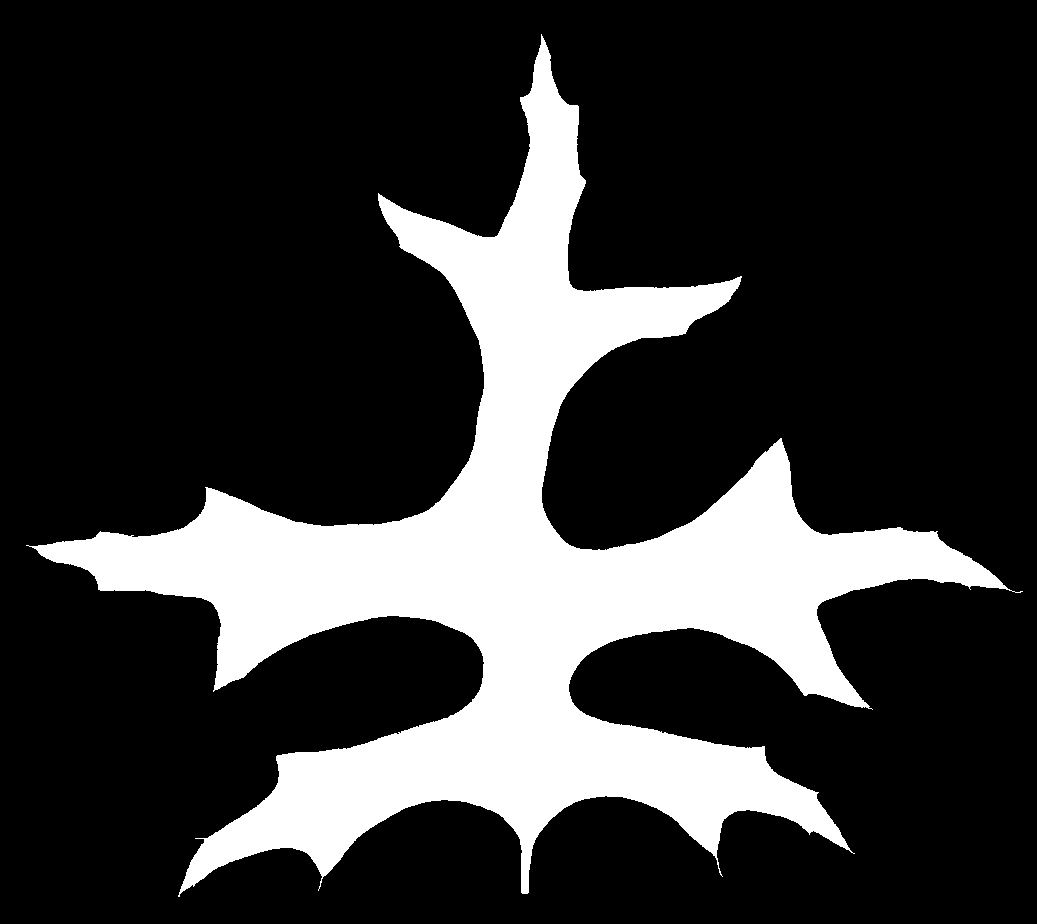

In [7]:
rand_image = './data/kaggle_images/53.jpg'
Image(filename=rand_image, width=400, height=400) 

In [8]:
train_data.__dict__

{'_data': BlockManager
 Items: Index([u'id', u'species', u'margin1', u'margin2', u'margin3', u'margin4',
        u'margin5', u'margin6', u'margin7', u'margin8',
        ...
        u'texture55', u'texture56', u'texture57', u'texture58', u'texture59',
        u'texture60', u'texture61', u'texture62', u'texture63', u'texture64'],
       dtype='object', length=194)
 Axis 1: RangeIndex(start=0, stop=990, step=1)
 FloatBlock: slice(2, 194, 1), 192 x 990, dtype: float64
 IntBlock: slice(0, 1, 1), 1 x 990, dtype: int64
 ObjectBlock: slice(1, 2, 1), 1 x 990, dtype: object,
 '_is_copy': None,
 '_item_cache': {}}

## Conclusion:
#### Datascience terms:
99 classes, 16 samples from each class.
data per image - id, species, margin (64), shape (64), texture (64)

Now, be mindful that these 3 features are a result of an extensive research and methods themselves.
For example, details about a "shape contiguous descriptor" can be found here:
https://www.math.uci.edu/icamp/summer/research_11/park/shape_descriptors_survey_part3.pdf
and
https://link.springer.com/chapter/10.1007%2F978-3-642-17691-3_32

I have not gone through the links but for the time being, just being respectful to the researchers and taking their word for it. This helps me to keep focus on the main task at hand for now

# Section 2: Additional feature extraction from images
#### Note: This section can be skipped in interest of time

I think I am distracting myself here, but the Kaggle project has this really cool notebook that I want to explore: Step-by-step guide for extracting features from shapes by turning them into time-series. Link: https://www.kaggle.com/lorinc/feature-extraction-from-images

So, here we go.

In [9]:
import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
from skimage import color
import scipy.ndimage as ndi            # to determine shape centrality

# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

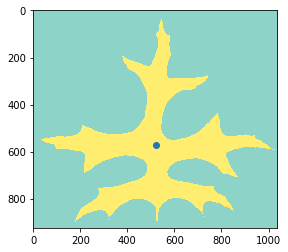

In [10]:
# reading the above image file using matplotlib into a numpy array
img = mpimg.imread('./data/kaggle_images/53.jpg') # img shape is (924, 1037) and consists of values from 0 to 255.
                                                  # but because this is a b/w pic, values are restricted to 0 or 254/255.

# using image processing module of scipy to find the center of the leaf
cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set3')  # plot leaf. cmap is for color
plt.scatter(cx, cy)           # plot center
plt.show()

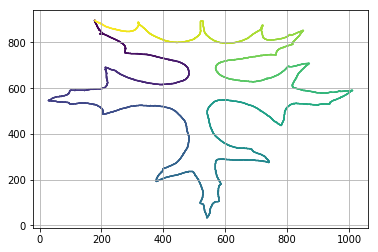

In [11]:
# scikit-learn imaging contour finding, returns a list of found edges
contours = measure.find_contours(img, .8)

# from which we choose the longest one
contour = max(contours, key=len)

# let us see the contour that we hopefully found
# plt.plot(contour[::,1], contour[::,0], linewidth=0.5)  # (I will explain this [::,x] later)
# plt.imshow(img, cmap='Set3')
# plt.show()

plt.scatter(contour[::,1],             
            contour[::,0],             
            linewidth=0, s=2,          
            c=range(len(contour)))
plt.grid()
plt.show()

# Interesting. Let's see how the second parameter in find_contours affects outputs.
# Broadly, find_contours implements a algo where a square of 2x2 is moved across
# the image and the darkest two pixels are picked to be the border. Fair.

# I didn't see any visual difference if I changed it to 0.1.
# Let's change the image and see the difference.

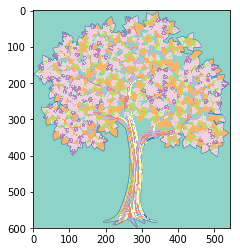

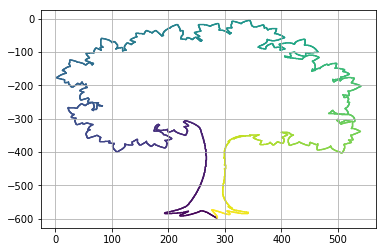

In [12]:
# But first another pretty picture :D

img_random = color.rgb2gray(mpimg.imread('./data/random_images/tree_clipart.png'))

# level = 0.8 does not yield any contour.
# So I think it is related to the size of box being used to move - 
# because it is a more complicated pic, we need a smaller box.

contours_random = measure.find_contours(img_random, level = .1)
contour_random = max(contours_random, key=len)
plt.plot(contour_random[::,1], contour_random[::,0], linewidth=0.5)
plt.imshow(img_random, cmap='Set3')
plt.show()

plt.scatter(contour_random[::,1],             
            -contour_random[::,0],             
            linewidth=0, s=2,          
            c=range(len(contour_random)))
plt.grid()
plt.show()

In [13]:
def cart2pol(x, y):
    # cartesian to polar coordinates
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

def get_contour(img, level = 0.8):
    contours = measure.find_contours(img, level)
    contour = max(contours, key=len)
    cy, cx = ndi.center_of_mass(img)
    
    # center the contour to (0, 0) so that polar coords work
    contour[::,1] -= cx  # demean X
    contour[::,0] -= cy  # demean Y

    polar_contour = np.array([cart2pol(x, y) for x, y in contour])
    
    return contour, polar_contour

(600, 544)
(7735, 2)
(7735, 2)


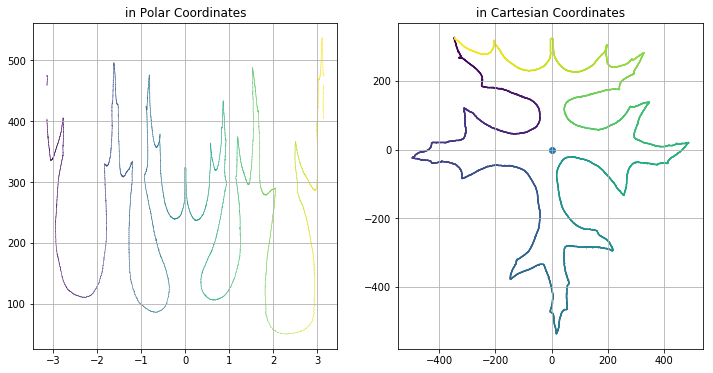

In [14]:
contour, polar_contour = get_contour(img)
print(img_random.shape)
print(contour.shape)
print(polar_contour.shape)

rcParams['figure.figsize'] = (12, 6)

plt.subplot(121)
plt.scatter(polar_contour[::,1],   # x axis is radians
            polar_contour[::,0],   # y axis is distance from center
            linewidth=0, s=.5,     # small points, w/o borders
            c=polar_contour[::,1]) # color dependent on x-axis!
plt.title('in Polar Coordinates')
plt.grid()

plt.subplot(122)
plt.scatter(contour[::,1],             
            contour[::,0],             
            linewidth=0, s=2,          
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()

plt.show()

(600, 544)
(5589, 2)
(5589, 2)


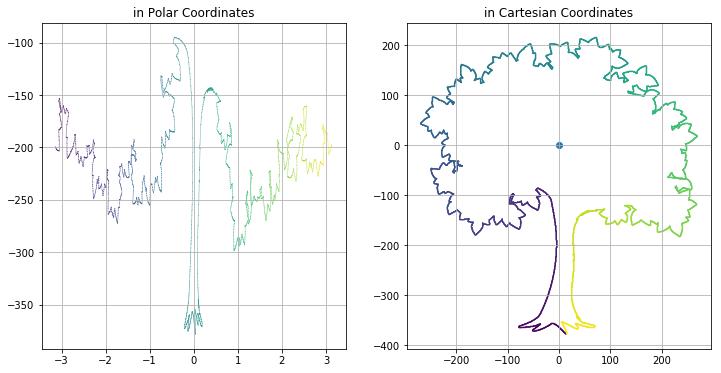

In [15]:
img_random = color.rgb2gray(mpimg.imread('./data/random_images/tree_clipart.png'))
contour, polar_contour = get_contour(img_random, 0.1)
print(img_random.shape)
print(contour.shape)
print(polar_contour.shape)

rcParams['figure.figsize'] = (12, 6)

plt.subplot(121)
plt.scatter(polar_contour[::,1],
            -polar_contour[::,0],     # multiplying by -1 to flip the image.
            linewidth=0, s=.5,
            c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()

plt.subplot(122)
plt.scatter(contour[::,1],             
            -contour[::,0],             
            linewidth=0, s=2,          
            c=range(len(contour)))
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()

plt.show()

#### Though it looks beautiful, I can see the problem in using this feature - 
#### same x-coord can have multiple y-values. Not impressed by the new feature.

### Abandon!!

# Section 3: Get to real work

In [16]:
import tensorflow as tf
import numpy as np

tf.logging.set_verbosity(tf.logging.INFO)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
!pip install sklearn

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


## Basic CNN
Convolution layer, pooling, Convolution layer, pooling, dense layer, another dense layer for output.

In [28]:
# Copied from https://www.tensorflow.org/tutorials/estimators/cnn
# But changed the number of filters etc according to our image input size - 96x96. MNIST is 28x28

num_data_classes = 99

def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 96, 96, 1])

    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 24 * 24 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=num_data_classes)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        retur
        n tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])
    }
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [22]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

all_image_data = load_images('./data/kaggle_images/')

In [23]:
print(len(all_image_data))
print(len(all_image_data[0]), len(all_image_data[0][0]))
print(len(all_image_data[1]), len(all_image_data[1][0]))

## Turns out all the images are different sizes!
## Have to deal with this before using in CNN because I am using dense layers as well 
## - doesn't matter for filter layers.

1584
(379, 689)
(614, 905)


In [24]:
# Parts of code from here: https://www.kaggle.com/abhmul/keras-convnet-lb-0-0052-w-visualization/comments
# This loads and resizes images to uniform size

from keras.preprocessing.image import img_to_array, load_img

def resize_img(img, max_dim=96):
    max_axis = max((0, 1), key=lambda i: img.size[i])
    scale = max_dim / float(img.size[max_axis])
    return img.resize((int(img.size[0] * scale), int(img.size[1] * scale)))

def load_image_data(ids, data_path, max_dim=96, center=True):
    # Input: an array of image ids to load from data_path
    # Initialize the output array
    X = np.empty((len(ids), max_dim, max_dim, 1))
    for i, idee in enumerate(ids):
        x = resize_img(load_img(os.path.join(data_path, str(idee) + '.jpg'), grayscale=True), max_dim=max_dim)
        x = img_to_array(x)
        # Get the corners of the bounding box for the image
        length = x.shape[0]
        width = x.shape[1]
        if center:
            h1 = int((max_dim - length) / 2)
            h2 = h1 + length
            w1 = int((max_dim - width) / 2)
            w2 = w1 + width
        else:
            h1, w1 = 0, 0
            h2, w2 = (length, width)
        X[i, h1:h2, w1:w2, 0:1] = x
    return np.around(X / 255.0)

Using TensorFlow backend.


In [25]:
# Now we want to split the input images according to the ids given in features training set.
# So we will read the training set to get the image ids of test set.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# standardize the data by setting the mean to 0 and std to 1
all_data = pd.read_csv('./data/train.csv')
label_col = all_data.pop('species')
id_col = all_data.pop('id')
data_standardized = pd.DataFrame(StandardScaler().fit(all_data).transform(all_data))
data_standardized.insert(0, 'id', id_col, True)
data_standardized.insert(1, 'species', label_col, True)

#SPLIT
data_train, data_test = train_test_split(data_standardized, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_train, test_size=0.2, random_state=1)

y_all = data_standardized['species']

lb = LabelBinarizer()
y_train = lb.fit(y_all).transform(data_train['species'])
y_test = lb.fit(y_all).transform(data_test['species'])
y_val = lb.fit(y_all).transform(data_val['species'])
print(y_train.shape, y_test.shape, y_val.shape)

X_train = data_train.drop(['id', 'species'], axis=1)
X_test = data_test.drop(['id', 'species'], axis=1)
X_val = data_val.drop(['id', 'species'], axis=1)
print(X_train.shape, X_test.shape, X_val.shape)

# Read corresponding images for test and train
img_data_path = './data/kaggle_images/'
X_train_images = load_image_data(data_train['id'], img_data_path)
X_test_images = load_image_data(data_test['id'], img_data_path)
X_val_images = load_image_data(data_val['id'], img_data_path)
print(X_train_images.shape, X_test_images.shape, X_val_images.shape)

/usr/local/lib/python2.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


((633, 99), (198, 99), (159, 99))
((633, 192), (198, 192), (159, 192))
((633, 96, 96, 1), (198, 96, 96, 1), (159, 96, 96, 1))


In [34]:
# TENSORFLOW CODE IS NOT WORKING ATM

# ## TRAIN 🚂

# # an Estimator (a TensorFlow class for performing high-level model training, 
# # evaluation, and inference) for our model
# mnist_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/mnist_convnet_model")

# # Set up logging for predictions
# tensors_to_log = {"probabilities": "softmax_tensor"}
# logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

# y_train_non_oho = tf.argmax(y_train, axis=1)

# print(y_train.shape)
# print(y_train_non_oho.shape)

# # Train the model
# train_input_fn = tf.estimator.inputs.numpy_input_fn(
#     x={"x": X_train_images},
#     y=y_train_non_oho,
#     batch_size=100,
#     num_epochs=None,
#     shuffle=True)

# # train one step and display the probabilties
# mnist_classifier.train(
#     input_fn=train_input_fn,
#     steps=1,
#     hooks=[logging_hook])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x14b28cf10>, '_model_dir': '/tmp/mnist_convnet_model', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_experimental_max_worker_delay_secs': None, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}
(633, 99)
(633,)


ValueError: Length of tensors in x and y is mismatched. All elements in x and y must have the same length.
Shapes in x: {'x': (633, 96, 96, 1)}
Shapes in y: (633,)


In [27]:
# Copied from https://keras.io/examples/cifar10_cnn/

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 99
epochs = 100
data_augmentation = False
# num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_leaf_trained_model_v2.h5'

x_train_model = X_train_images
x_test_model = X_test_images
x_val_model = X_val_images
Y_train_model = y_train
Y_test_model = y_test
Y_val_model = y_val

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_model.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train_model, Y_train_model,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test_model, Y_test_model),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_model)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train_model, Y_train_model,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test_model, Y_test_model),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_val_model, Y_val_model, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Not using data augmentation.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 633 samples, validate on 198 samples
Epoch 1/100
633/633 [==============================] - 12s 20ms/step - loss: 4.5732 - acc: 0.0126 - val_loss: 4.5021 - val_acc: 0.0808
Epoch 2/100
633/633 [==============================] - 11s 18ms/step - loss: 4.3290 - acc: 0.0474 - val_loss: 4.2193 - val_acc: 0.1162
Epoch 3/100
633/633 [==============================] - 11s 18ms/step - loss: 3.9879 - acc: 0.0979 - val_loss: 3.8322 - val_acc: 0.1465
Epoch 4/100
633/633 [==============================] - 11s 18ms/step - loss: 3.6568 - acc: 0.1374 - val_loss: 3.4845 - val_acc: 0.2121
Epoch 5/100
633/633 [==============================] - 11s 18ms/step - loss: 3.2602 - acc: 0.2370 - val_loss: 3.2323 - val_acc: 0.2980
Epoch 6/100
633/633 [=============

633/633 [==============================] - 11s 18ms/step - loss: 0.1662 - acc: 0.9431 - val_loss: 2.4461 - val_acc: 0.5859
Epoch 47/100
633/633 [==============================] - 11s 18ms/step - loss: 0.1162 - acc: 0.9573 - val_loss: 2.6709 - val_acc: 0.5808
Epoch 48/100
633/633 [==============================] - 11s 18ms/step - loss: 0.0956 - acc: 0.9747 - val_loss: 2.7370 - val_acc: 0.6061
Epoch 49/100
633/633 [==============================] - 11s 18ms/step - loss: 0.1057 - acc: 0.9637 - val_loss: 2.7733 - val_acc: 0.5707
Epoch 50/100
633/633 [==============================] - 11s 18ms/step - loss: 0.1278 - acc: 0.9652 - val_loss: 2.7715 - val_acc: 0.6061
Epoch 51/100
633/633 [==============================] - 11s 18ms/step - loss: 0.1147 - acc: 0.9621 - val_loss: 2.6094 - val_acc: 0.6061
Epoch 52/100
633/633 [==============================] - 11s 17ms/step - loss: 0.0968 - acc: 0.9637 - val_loss: 2.7768 - val_acc: 0.5758
Epoch 53/100
633/633 [==============================] - 11s 1